**Exp 1:Creating & Visualizing Neural Network for the given data. (Use python)
Note: download dataset using Kaggal. Keras, ANN visualizer, graph viz libraries are
required**


# Artificial Neural Network on PIMA Diabetes Dataset

In this notebook, we will:
1. Download dataset from Kaggle.
2. Preprocess the data (scaling & splitting).
3. Build an **Artificial Neural Network (ANN)** using Keras.
4. Train and evaluate the model.
5. Visualize the ANN structure using `ANNVisualizer`.
6. Plot accuracy and loss curves.

**Libraries Used:**
- TensorFlow/Keras → To build and train ANN.
- Sklearn → For preprocessing and train-test split.
- ANNVisualizer + Graphviz → To visualize the network architecture.
- Kaggle API → To fetch dataset directly into Colab.


In [2]:
!pip install keras tensorflow ann_visualizer graphviz pydot kaggle


  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4169 sha256=eb4fdad529d949d279a0532e0f11cbfc2646042a8c365b8f213e42c514efb656
  Stored in directory: /root/.cache/pip/wheels/8b/79/4f/615286a2b1695b24d4170dc8a88b48d1e76aebf2d11e8817d0
Successfully built ann_visualizer


### Step: Setup Kaggle API
To download datasets from Kaggle in Colab, we need:
1. Go to your Kaggle account → Account → API → Create New API Token.
2. A file `kaggle.json` will be downloaded.
3. Upload it here.


In [3]:
from google.colab import files
files.upload()  # Upload kaggle.json

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


### Step: Download PIMA Indians Diabetes Dataset
We will use the **PIMA Indians Diabetes dataset** from Kaggle.
This dataset contains diagnostic measurements to predict whether a patient has diabetes.


In [4]:
!kaggle datasets download -d mathchi/diabetes-data-set
!unzip -o diabetes-data-set.zip


Dataset URL: https://www.kaggle.com/datasets/mathchi/diabetes-data-set
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 39.4MB/s]
Archive:  diabetes-data-set.zip
  inflating: diabetes.csv            


### Step: Import Libraries
We will now import all the required libraries for:
- Data handling (`pandas`, `numpy`)
- Preprocessing (`StandardScaler`, `train_test_split`)
- Building ANN (`keras`)
- Visualization (`matplotlib`, `ann_visualizer`)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from ann_visualizer.visualize import ann_viz


### Step: Load and Explore Dataset
We will load the dataset into a Pandas DataFrame and check:
- Shape of dataset
- First few rows


In [6]:
data = pd.read_csv("diabetes.csv")
print("Dataset Shape:", data.shape)
data.head()


Dataset Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Step: Data Preprocessing
1. Separate features (`X`) and target (`y`).
2. Split dataset into training and testing sets.
3. Scale features using **StandardScaler** for better ANN convergence.


In [7]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Step: Build Artificial Neural Network
- Input layer: 8 features
- Hidden Layer 1: 12 neurons, ReLU activation
- Hidden Layer 2: 8 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation (for binary classification)


In [8]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step: Train ANN
We will train the ANN for **50 epochs** with a batch size of 10.


In [9]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10,
                    validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3430 - loss: 0.7942 - val_accuracy: 0.5844 - val_loss: 0.6777
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6142 - loss: 0.6373 - val_accuracy: 0.6429 - val_loss: 0.5987
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6434 - loss: 0.5873 - val_accuracy: 0.6558 - val_loss: 0.5656
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6570 - loss: 0.5420 - val_accuracy: 0.6688 - val_loss: 0.5524
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6626 - loss: 0.5417 - val_accuracy: 0.6883 - val_loss: 0.5438
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6836 - loss: 0.5408 - val_accuracy: 0.7078 - val_loss: 0.5363
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7213 - loss: 0.5358 - val_accuracy: 0.7143 - val_loss: 0.5288
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7216 - loss: 0.5018 - val_accuracy: 0.7403 - val_loss:

### Step: Evaluate ANN Model
Check performance on **test data**.


In [10]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {accuracy*100:.2f}%")



✅ Test Accuracy: 77.27%


### Step: Visualize ANN using `plot_model`

Apart from `ANNVisualizer`, Keras provides an inbuilt utility called **`plot_model`** to create a graphical diagram of the neural network.

- **`plot_model(model, ...)`** generates a PNG image (or SVG) showing the structure of the ANN.
- Parameters:
  - `to_file='model_plot.png'` → saves the visualization as an image file.
  - `show_shapes=True` → shows the shape of inputs/outputs for each layer (e.g., `(None, 8)`).
  - `show_layer_names=True` → displays layer names like `dense`, `dense_1`, etc.

This visualization is very helpful for:
1. **Understanding architecture** → how many layers and neurons are used.
2. **Debugging model** → ensuring correct input/output shapes.
3. **Documentation** → including diagrams of ANN in reports or research papers.

Finally, we display the generated image using:
```python
from IPython.display import Image
Image(filename='model_plot.png')


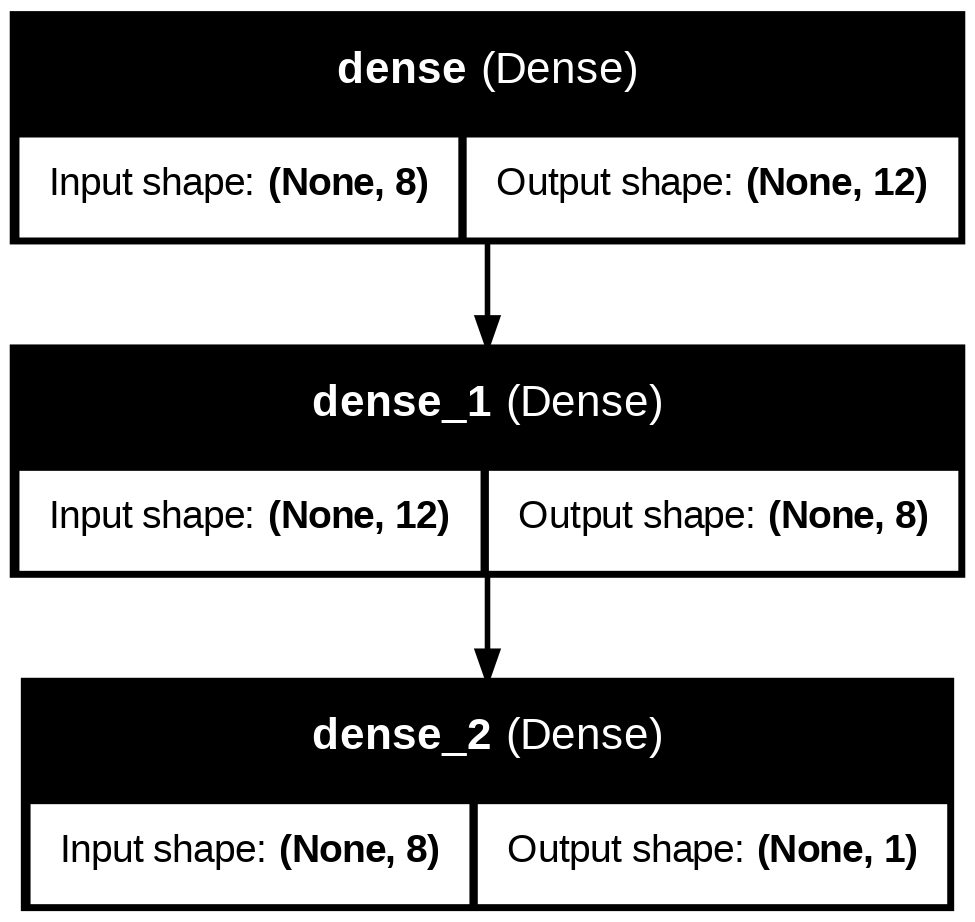

In [13]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the image
from IPython.display import Image
Image(filename='model_plot.png')

### Step: Accuracy & Loss Curves
We will plot:
- Training vs Validation Accuracy
- Training vs Validation Loss


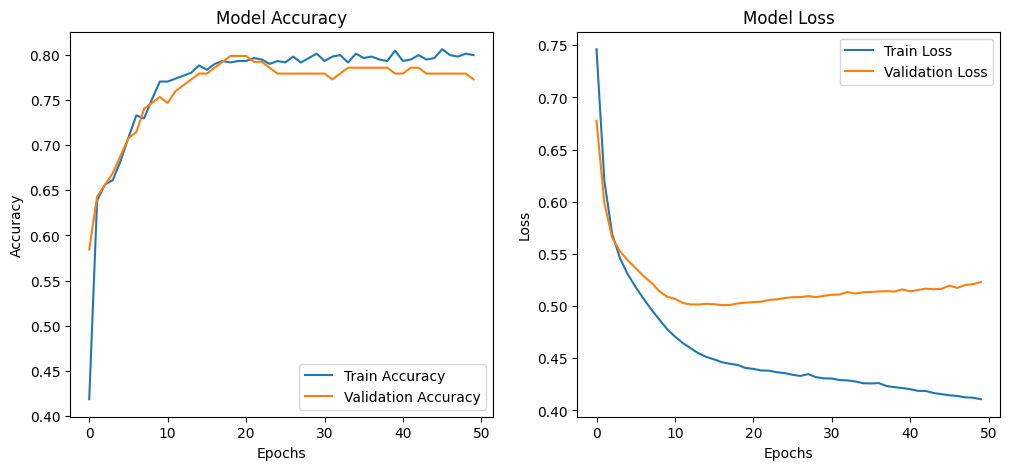

In [15]:
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()
